# Class

Classes provide a means of bundling data and functionality together. Creating a new class creates a new type of object, allowing new instances of that type to be made. Each class instance can have attributes attached to it for maintaining its state. Class instances can also have methods (defined by its class) for modifying its state.

The **self** parameter is a reference to the current instance of the class, and is used to access variables that belongs to the class.

In [0]:
class Person:    
    '''
    This class represent a Person.
    : attribute first_name: First name of the person
    : attribute last_name: Last name of the person    
    '''
    def __init__(self, first_name, last_name):
        '''
        This function is always called when an instance of a class is created(Constructor).
        The __init__() function is used to assign values to object properties or
        other operations that are necessary to do when the object is being created.
        '''
        self.first_name = first_name
        self.last_name = last_name        
    
class Patient(Person):
    '''
    This class is inherited from Person class. It represents Patients.
    : attribute patient_id: ID number of patient
    '''
    def __init__(self, first_name, last_name, pid):
        '''
        Constructor of Patient class.
        We also call the constructor of the class Person from which it was inherited from.
        '''
        super(Patient, self).__init__(first_name, last_name)
        self.patient_id = pid
      
    def __str__(self):
        '''
        This function is called when we want to print the details of an object of the class
        '''
        return ("Name: {} {} \n Patient ID: {} \n".format(self.first_name, self.last_name, self.patient_id))
        
class WaitingRoom:
    '''
    This class represent a waiting room. We have list of patients waiting.
    : attribute patient: a list of patients
    '''
    def __init__(self, patients):
        '''
        Constructor
        '''
        self.patients = patients
    
    def __getitem__(self, index):
        '''
        This function return a patient using the index. We can then iterate over the class instance  like a list.
        '''
        return self.patients[index]
    
    def __len__(self):
        '''
        Returns the number of patients in the room
        '''
        return len(self.patients)


    

In [0]:
# We declare two patients
patient_1 = Patient("Wayne", "Rooney", "1234")
patient_2 = Patient("Wayne", "Bridge", "1214")

# Declare a list of patients and add the patients to this list
patients = []
patients.append(patient_1)
patients.append(patient_2)

# Add the patients to the waiting room

waiting_room = WaitingRoom(patients)

In [0]:
# Let see how many people are there in the waiting room

print(len(waiting_room))

2


In [0]:
# Let is loop over the patients in the waiting room and print their details

for p in waiting_room:
    print(p)

Name: Wayne Rooney 
 Patient ID: 1234 

Name: Wayne Bridge 
 Patient ID: 1214 



# Get the data (Recap)

First we need access to data. 
- You can use this link to add the data to your drive: https://drive.google.com/drive/folders/1pHNxZVrlcKh5usWoNC_V7gR2WdeDutjv

- Then go inside the folder **CS_for_MedStudents_data** and you will see the folder **HAM10000**.
- Right click on the **HAM10000** folder and click on the **Add to my Drive** option.

Now you can run the next cell

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_dir = "/content/drive/My Drive/HAM10000"
classes = [ 'actinic keratoses', 'basal cell carcinoma', 'benign keratosis-like lesions', 
           'dermatofibroma','melanoma', 'melanocytic nevi', 'vascular lesions']

# Data Augmentation

It is a common fact that medical data is scarce. But to learn a very good model, the network needs a lot of data. So to tackle the problem we perform data augmentation.

Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. 

Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks.

![Data Augmentation](https://cdn-images-1.medium.com/max/1000/1*C8hNiOqur4OJyEZmC7OnzQ.png)
[Source](https://cdn-images-1.medium.com/max/1000/1*C8hNiOqur4OJyEZmC7OnzQ.png) 


**Normalization**
Data normalization is an important step which ensures that each input parameter (pixel, in this case) has a similar data distribution. This makes convergence faster while training the network. 

Data normalization is done by subtracting the mean from each pixel and then dividing the result by the standard deviation. The distribution of such data would resemble a Gaussian curve centered at zero. 

![Normalization](http://agnesmustar.com/wp-content/uploads/2017/09/image_normalization-1024x353.jpeg)
[Source](http://agnesmustar.com/wp-content/uploads/2017/09/image_normalization-1024x353.jpeg) 

Since, skin lesion images are natural images, we use the normalization values (mean and standard deviation) from [Imagenet dataset.](http://www.image-net.org/)
*norm_mean = (0.4914, 0.4822, 0.4465)*

*norm_std = (0.2023, 0.1994, 0.2010)*

This denotes mean and standard deviation for each channel(RGB) of an image.


We perform following data augmentation:
- Resize the image.
- Flipping the image horizontally.
- Randomly rotating image.
- Normalizing the image.

In [0]:
import torchvision.transforms as transforms

# Imagenet values
norm_mean = (0.4914, 0.4822, 0.4465)
norm_std = (0.2023, 0.1994, 0.2010)

augmentation_train = transforms.Compose([transforms.Resize((224,224)),
                                  transforms.RandomHorizontalFlip(),
                                  transforms.RandomRotation(degrees=60),
                                  transforms.ToTensor(),
                                  transforms.Normalize(norm_mean, norm_std),
                                   ])

**Note**: An important aspect is that we only augment the images used for training. So for testing we don't use the geometric augmentations.

In [0]:
augmentation_test = transforms.Compose([
                    transforms.Resize((224,224)),
                    transforms.ToTensor(),
                    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
                    ])


# Loading the data

Use the **torchvision.datasets.ImageFolder** dataset class. This class requires the dataset to be arranged into folders of their respective class or labels. We already provide the dataset in suitable preprocessed format.

Here we also apply the augmentation that we defined above.

You can check here : https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder

In [0]:
import torchvision

dataset = torchvision.datasets.ImageFolder(root= data_dir, transform= augmentation_train)

Let's try to use the __getitem__ method of the ImageFolder class.

In [6]:
# Check the dimension of the 1000th image and its corresponding label

image, label = dataset[1000]
print("Image Shape: {} \n Label: {} \n Lesion Type: {}".format(image.shape, label, classes[label]))

Image Shape: torch.Size([3, 224, 224]) 
 Label: 2 
 Lesion Type: benign keratosis-like lesions


# Train, Test and Validation Split
It is a best practice to split the entire dataset into 3 parts:
- Train: Used to train a network.
- Validation: Fine tune the network.
- Test: Kept as unseen data to gauge the performance of out trained network.


The splitting should be done class wise so that we have equal representation of all classes in each subset of the data.

In [0]:
import torch
from sklearn.model_selection import train_test_split

num_train = len(dataset)
indices = list(range(num_train))
class_labels = dataset.targets
split_size = 0.2


train_indices, test_indices, class_labels_train, class_labels_test = train_test_split(indices,
                                                                                       class_labels,
                                                                                       test_size=split_size,
                                                                                       shuffle=True,
                                                                                       stratify= class_labels,
                                                                                       random_state=42)

train_indices, val_indices = train_test_split(train_indices,
                                               test_size=split_size,
                                               shuffle=True,
                                               stratify= class_labels_train,
                                               random_state=42)

# Creating data samplers and loaders using the indices:
SubsetRandomSampler = torch.utils.data.sampler.SubsetRandomSampler

train_samples = SubsetRandomSampler(train_indices)
val_samples = SubsetRandomSampler(val_indices)
test_samples = SubsetRandomSampler(test_indices)

# Dataloader

We will now use the dataloader to load the entire dataset in small batches.

**Epochs vs Iteration vs Batch size**

One **Epoch** is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.
Now, we have more than 10000 images in our dataset. It is not possible to feed the entire dataset at once to the computer. So, we divide the data into several smaller batches.

**Batch Size** is number of training examples present in a single batch.

**Iterations** are the number of batches needed to complete one epoch.

An Example:

If we have 10000 training images in our dataset. We can divide the dataset into **batches of 500** then it will take **4 iterations** to complete **1 epoch**.


That's where a pytorch dataloader is useful: https://pytorch.org/docs/stable/data.html

In [0]:
batch_size, validation_batch_size, test_batch_size = 32, 32, 32

train_data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=False,num_workers=1, sampler= train_samples)

dataset = torchvision.datasets.ImageFolder(root= data_dir, transform=augmentation_test)
validation_data_loader = torch.utils.data.DataLoader(dataset, batch_size=validation_batch_size, shuffle=False, sampler=val_samples)
test_data_loader = torch.utils.data.DataLoader(dataset, batch_size=test_batch_size, shuffle=False, sampler=test_samples)

Let us display the loaded batched images:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


melanoma,  melanocytic nevi,  melanocytic nevi,  melanocytic nevi,  actinic keratoses,  melanocytic nevi,  melanocytic nevi,  actinic keratoses,  melanocytic nevi,  benign keratosis-like lesions,  benign keratosis-like lesions,  melanocytic nevi,  melanocytic nevi,  melanocytic nevi,  melanocytic nevi,  melanocytic nevi,  melanocytic nevi,  melanocytic nevi,  melanocytic nevi,  melanocytic nevi,  melanocytic nevi,  melanocytic nevi,  melanocytic nevi,  melanocytic nevi,  melanocytic nevi,  benign keratosis-like lesions,  melanoma,  melanocytic nevi,  melanocytic nevi,  melanocytic nevi,  melanocytic nevi,  melanocytic nevi, 


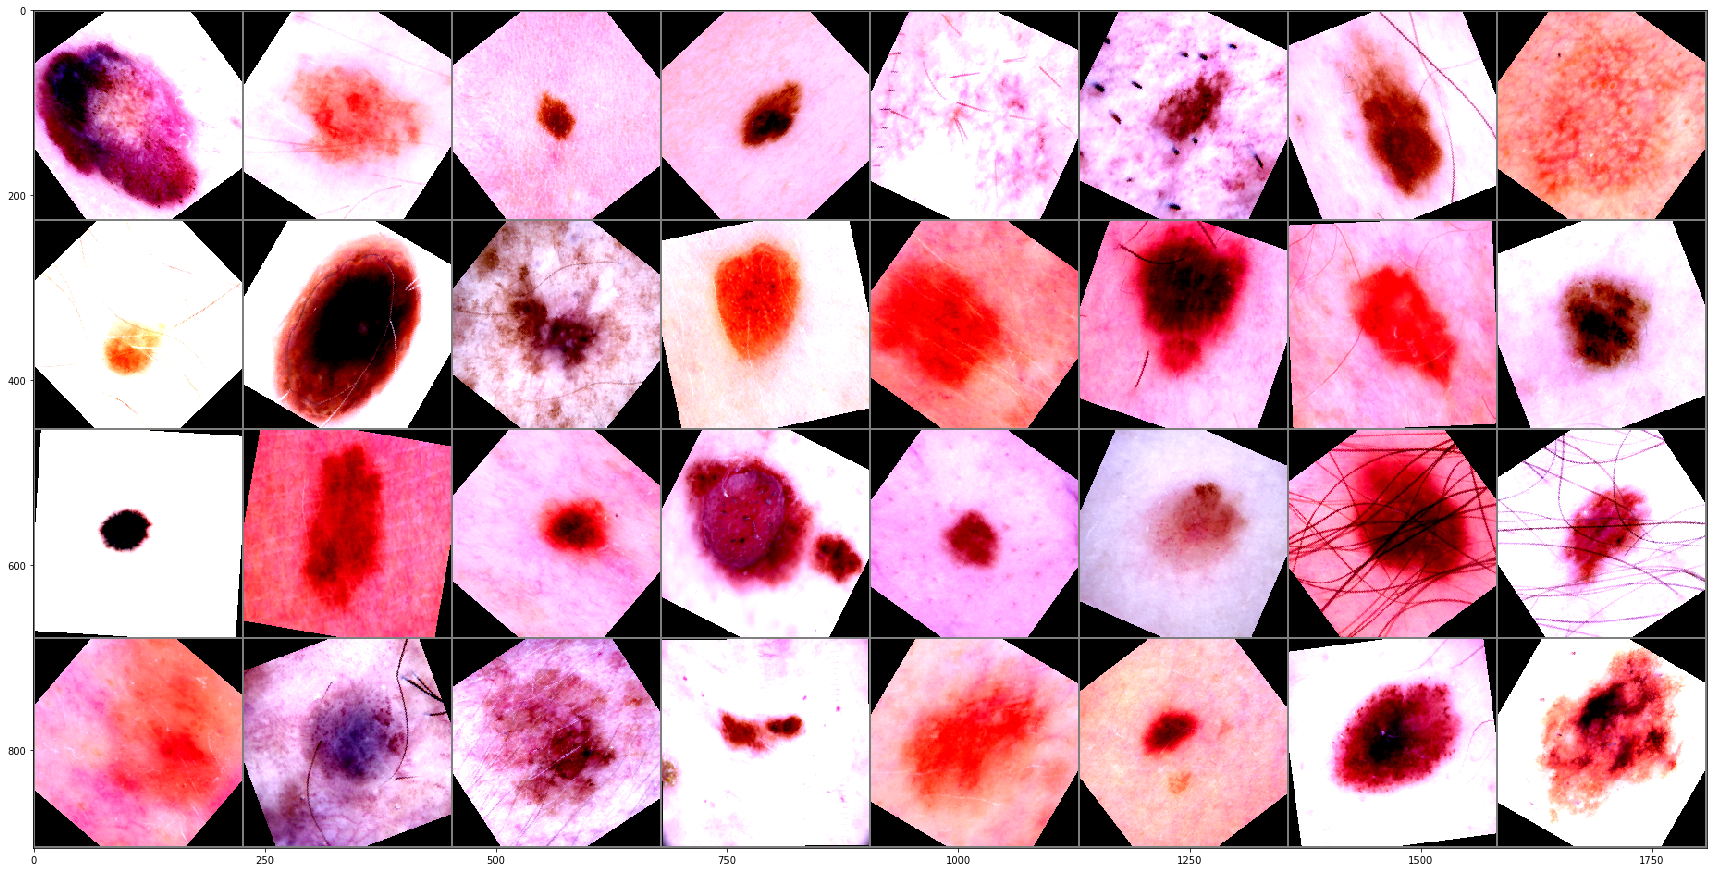

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
fig = plt.figure(figsize=(30, 30))
def imshow(img):
    img = img / 2 + 0.5     # denormalize change this
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get first batch of training images
dataiter = iter(train_data_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s, ' % classes[labels[j]] for j in range(len(labels))))


Now, we have our dataset loaded Let's try to do something cool with it.

For now, we will use an pre trained network to do inference on the test set of out data. Let's see how is the performance without training

In [0]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# load a pretrained model
from torch import nn
import torchvision

num_classes = len(classes)
net = torchvision.models.resnet18(pretrained = True)

# We replace last layer of resnet to match our number of classes which is 7
net.fc = nn.Linear(512, num_classes)
net = net.to(device)

In [15]:
correct = 0
total = 0
net.eval()
with torch.no_grad():
  dataiter = iter(train_data_loader)
  images, labels = dataiter.next()
  images, labels = images.to(device), labels.to(device)
  outputs = net(images)
  _, predicted = torch.max(outputs.data, 1)
  total += labels.size(0)
  correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 6 %
